3.1 Problem 1

In [ ]:
import pandas as pd

bank_data= pd.read_csv("/content/drive/MyDrive/AI/Resources/Week2/Copy of bank .csv")
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [ ]:
obj_columns= bank_data.select_dtypes(include=['object']).columns
print(f"Columns with dtype=object: {list(obj_columns)}")

Columns with dtype=object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
for col in obj_columns:
  print("Unique value:", bank_data[col].unique())

Unique value: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique value: ['married' 'single' 'divorced']
Unique value: ['tertiary' 'secondary' 'unknown' 'primary']
Unique value: ['no' 'yes']
Unique value: ['yes' 'no']
Unique value: ['no' 'yes']
Unique value: ['unknown' 'cellular' 'telephone']
Unique value: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique value: ['unknown' 'failure' 'other' 'success']
Unique value: ['no' 'yes']


In [ ]:
null_value= bank_data.isnull().sum()
print("null values:\n", null_value)

null values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
drop_obj = bank_data.drop(columns=obj_columns, errors='ignore')
drop_obj.to_csv("/content/drive/MyDrive/AI/Resources/Week2/banknumericdata.csv", index=False)
newDataFrame= pd.read_csv("/content/drive/MyDrive/AI/Resources/Week2/banknumericdata.csv")
newDataFrame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2

In [74]:
import pandas as pd;
medical_data= pd.read_csv("/content/drive/MyDrive/AI/Resources/Week2/Copy of medical_students_dataset.csv")
medical_data.info()
medical_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [75]:
null_value= medical_data.isnull().sum()
print("Columns with missing values:\n", null_value)


Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [76]:
for col in medical_data.columns:
  if medical_data[col].isnull().sum() > 0:
    if medical_data[col].dtype == 'object':
      #Filled categorical column with mode
      medical_data[col] = medical_data[col].fillna(medical_data[col].mode()[0])
    else:
      #Filled numeric columns with mean
      medical_data[col] = medical_data[col].fillna(medical_data[col].mean())

print("\nMissing values after filling:")
print(medical_data.isnull().sum())


Missing values after filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [79]:
print("\nNumber of duplicate rows:", medical_data.duplicated().sum())
medical_data = medical_data.drop_duplicates()
print("Number of rows after removing duplicates:", len(medical_data))


Number of duplicate rows: 0
Number of rows after removing duplicates: 187428


3.2 Problem 1

In [66]:
import pandas as pd

titanic= pd.read_csv("/content/drive/MyDrive/AI/Resources/Week2/Copy of Titanic-Dataset.csv")
subset= titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class= subset[subset['Pclass']== 1]
print(f"first class passengers: {first_class}")

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Max Fare: {max_fare}")
print(f"Min Fare: {min_fare}")


first class passengers:                                                   Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   

        Fare  S

Problem 2

In [67]:
null_value= subset['Age'].isnull().sum()
print(f"before dropping:{null_value}")

subset_cleaned = subset.dropna(subset=['Age'])

null_count_after = subset_cleaned['Age'].isnull().sum()
print(f"after dropping: {null_count_after}")
print(titanic.head())

before dropping:177
after dropping: 0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

Problem 3

In [68]:
encoded_embark= pd.get_dummies(titanic['Embarked'] ,prefix='Embarked');
titanic= pd.concat([titanic, encoded_embark], axis=1)
titanic.drop(columns=['Embarked'], inplace=True)


In [69]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem 4

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


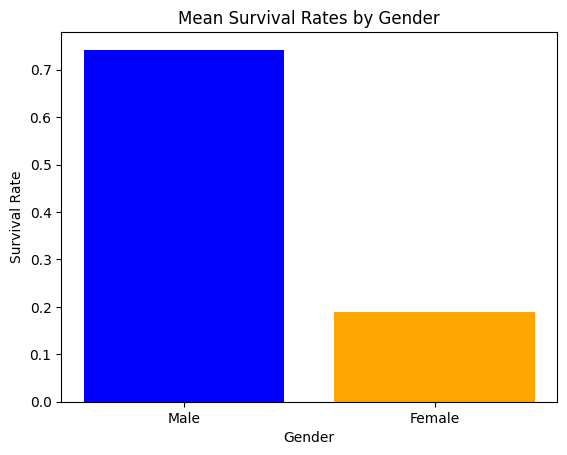

In [70]:
import matplotlib.pyplot as plt

survival_rates_by_gender = titanic.groupby('Sex')['Survived'].mean()
print(survival_rates_by_gender)
plt.bar(['Male', 'Female'], survival_rates_by_gender, color=['blue', 'orange'])
plt.title("Mean Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


Problem 5

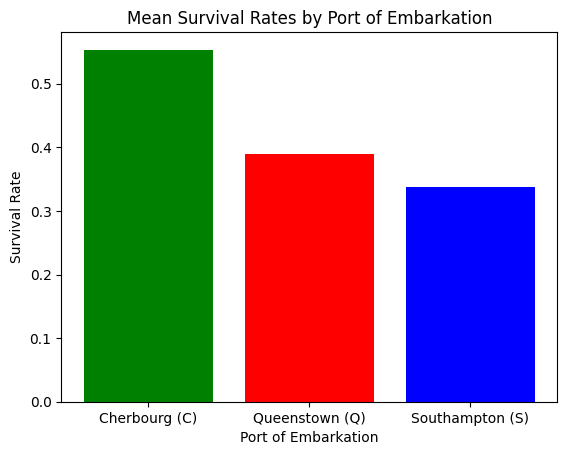

In [73]:
import matplotlib.pyplot as plt

survival_rates_by_port = [
    titanic[titanic['Embarked_C'] == 1]['Survived'].mean(),
    titanic[titanic['Embarked_Q'] == 1]['Survived'].mean(),
    titanic[titanic['Embarked_S'] == 1]['Survived'].mean()
]

ports = ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)']
plt.bar(ports, survival_rates_by_port, color=['green', 'red', 'blue'])
plt.title("Mean Survival Rates by Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")

# Show the plot
plt.show()
